In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
from pycytominer.cyto_utils import infer_cp_features
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds
from utils import eval

In [2]:
batch = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv')
b = batch[['Metadata_Batch_Number', 'Metadata_Plate', 'Metadata_Well']]
meta = pd.read_csv('../baseline/meta.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
name = 'base'
df = pd.read_csv('2016_04_01_a549_48hr_batch1_dmso_spherized_profiles_with_input_normalized_by_dmso_consensus_median.csv.gz')
df = ds.clean_moas(df)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df, features=features, meta_features=meta_features)
exec(name + "_pre = eval.prec_mean(e.eval(df, operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(df, operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(df, operation = 'hitk'))")
exec(name + "_enr = e.eval(df, operation = 'enrichment')")

In [4]:
# select subsections
index812 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/812_index.csv')
index817 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/817_index.csv')
index823 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/823_index.csv')
index826 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/826_index.csv')
index924 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/924_index.csv')

# 812
Top 50 MOAs

In [ ]:
df812_in = df[df.Metadata_moa.isin(index812['Metadata_moa'].unique().tolist())]
df812_out = df[~df.Metadata_moa.isin(index812['Metadata_moa'].unique().tolist())]

In [35]:
name = "df812_in"
features = infer_cp_features(df812_in)
meta_features = infer_cp_features(df812_in, metadata=True)
e = eval.evaluation(df812_in, features=features, meta_features=meta_features)
exec(name + "_pre = eval.prec_mean(e.eval(" + name + " , operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(" + name + ", operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

In [36]:
name = "df812_out"
exec("features = infer_cp_features(" + name + ")")
exec("meta_features = infer_cp_features(" + name + ", metadata=True)")
exec("e = eval.evaluation(" + name + " , features=features, meta_features=meta_features)")
exec(name + "_pre = eval.prec_mean(e.eval(" + name + " , operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(" + name + ", operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

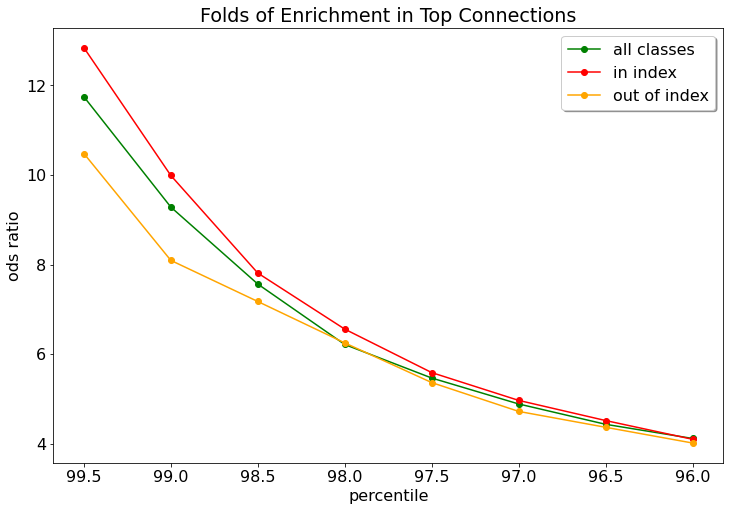

In [40]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*base_enr["enrichment_percentile"], base_enr["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*df812_in_enr["enrichment_percentile"], df812_in_enr["ods_ratio"], marker="o", color="red", label = 'in index')
plt.plot(100*df812_out_enr["enrichment_percentile"], df812_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [39]:
print(df812_in_pre_r)
print(df812_out_pre_r)
print(base_pre_r)

0.12251025659971886
0.04605110336817655
0.056404115953036016


P@R base: 0.056404115953036016
P@R in: 0.12251025659971886
P@R out: 0.04605110336817655


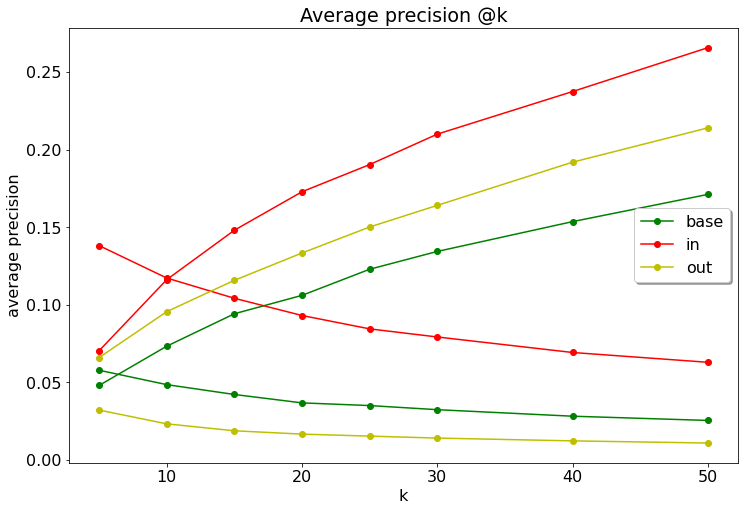

In [43]:
print(f"P@R base: {base_pre_r}")
print(f"P@R in: {df812_in_pre_r}")
print(f"P@R out: {df812_out_pre_r}")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="green", label = 'base')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="g")
plt.plot(df812_in_pre["k"], df812_in_pre["precision"], marker="o", color="r", label = 'in')
plt.plot(df812_in_pre["k"], df812_in_pre["recall"], marker="o", color="red")
plt.plot(df812_out_pre["k"], df812_out_pre["precision"], marker="o", color="y", label = 'out')
plt.plot(df812_out_pre["k"], df812_out_pre["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

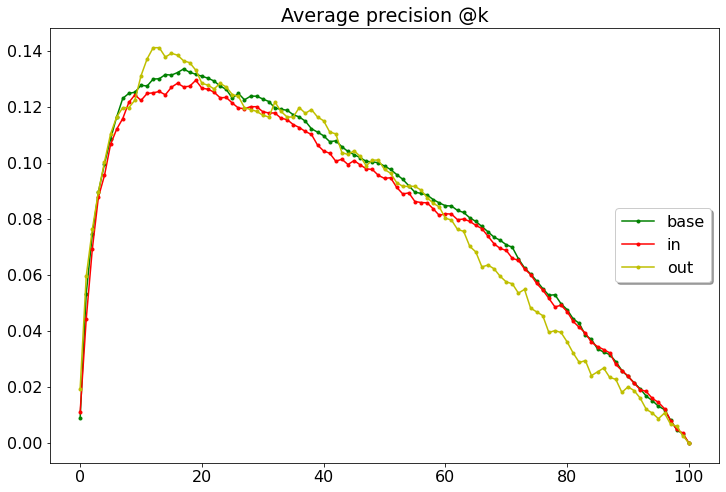

In [44]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_hit, marker=".", color="g", label = 'base')
plt.plot(df812_in_hit, marker=".", color="r", label = 'in')
plt.plot(df812_out_hit, marker=".", color="y", label = 'out')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [45]:
# maybe hit@k isnt that good after all...

In [46]:
name = 'base'
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df, features=features, meta_features=meta_features)
base_pre_all = e.eval(df, operation = 'precision_recall')

In [58]:
base_pre_in = base_pre_all[base_pre_all.Metadata_broad_sample.isin(index812['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_in.k.unique():
    pr_av.append(base_pre_in.query("k==@k").mean().tolist())
base_pre_in = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])
base_pre_in

,k,precision,recall
0,5.0,0.094716,0.050026
1,10.0,0.083170,0.086083
2,15.0,0.072929,0.111732
3,20.0,0.063894,0.127002
4,25.0,0.060978,0.147880
5,30.0,0.056425,0.161743
6,40.0,0.048728,0.182831
7,50.0,0.043679,0.199294


In [59]:
base_pre_out = base_pre_all[~base_pre_all.Metadata_broad_sample.isin(index812['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_out.k.unique():
    pr_av.append(base_pre_out.query("k==@k").mean().tolist())
base_pre_out = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])
base_pre_out

,k,precision,recall
0,5.0,0.027848,0.046267
1,10.0,0.020411,0.062917
2,15.0,0.017194,0.080006
3,20.0,0.014715,0.089132
4,25.0,0.013924,0.102707
5,30.0,0.012816,0.112263
6,40.0,0.011432,0.130003
7,50.0,0.010570,0.148432


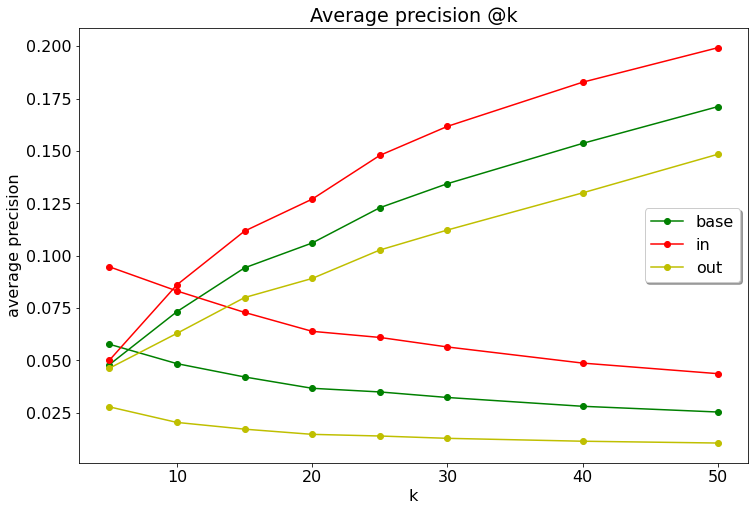

In [60]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="green", label = 'base')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="g")
plt.plot(base_pre_in["k"], base_pre_in["precision"], marker="o", color="r", label = 'in')
plt.plot(base_pre_in["k"], base_pre_in["recall"], marker="o", color="red")
plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()


# 823
Bottom 50 MOAs

In [70]:
df823_in = df[df.Metadata_moa.isin(index823['Metadata_moa'].unique().tolist())]
df823_out = df[~df.Metadata_moa.isin(index823['Metadata_moa'].unique().tolist())]

In [71]:
name = "df823_in"
features = infer_cp_features(df823_in)
meta_features = infer_cp_features(df823_in, metadata=True)
e = eval.evaluation(df823_in, features=features, meta_features=meta_features)
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

In [72]:
name = "df823_out"
exec("features = infer_cp_features(" + name + ")")
exec("meta_features = infer_cp_features(" + name + ", metadata=True)")
exec("e = eval.evaluation(" + name + " , features=features, meta_features=meta_features)")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

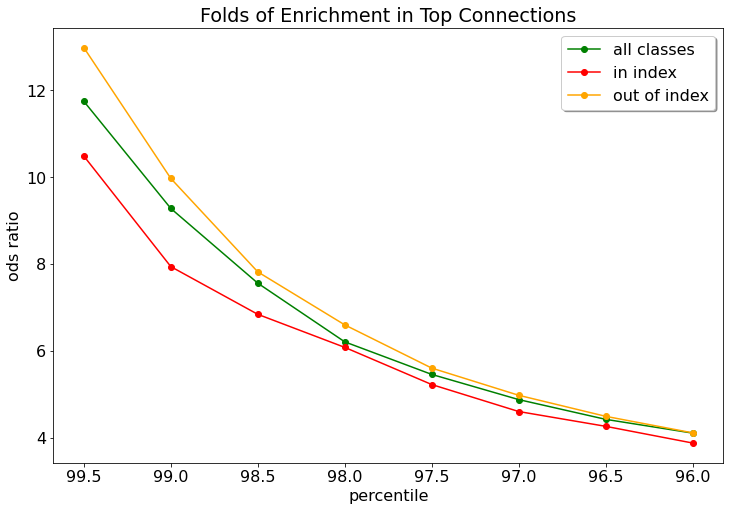

In [73]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*base_enr["enrichment_percentile"], base_enr["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*df823_in_enr["enrichment_percentile"], df823_in_enr["ods_ratio"], marker="o", color="red", label = 'in index')
plt.plot(100*df823_out_enr["enrichment_percentile"], df823_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [75]:
base_pre_in = base_pre_all[base_pre_all.Metadata_broad_sample.isin(index823['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_in.k.unique():
    pr_av.append(base_pre_in.query("k==@k").mean().tolist())
base_pre_in = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])

In [76]:
base_pre_out = base_pre_all[~base_pre_all.Metadata_broad_sample.isin(index823['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_out.k.unique():
    pr_av.append(base_pre_out.query("k==@k").mean().tolist())
base_pre_out = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])

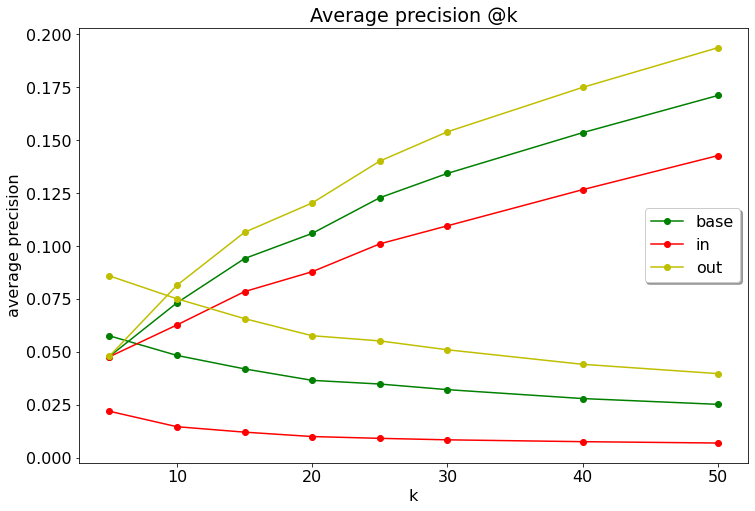

In [77]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="green", label = 'base')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="g")
plt.plot(base_pre_in["k"], base_pre_in["precision"], marker="o", color="r", label = 'in')
plt.plot(base_pre_in["k"], base_pre_in["recall"], marker="o", color="red")
plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()


# new
High phenotype MOAs

In [127]:
select = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/new_high_pheno.csv')

In [128]:
len(select['0'].tolist())

489

In [129]:
df1025_in = df[df.Metadata_broad_sample.isin(select['0'].tolist())]
df1025_out = df[~df.Metadata_broad_sample.isin(select['0'].tolist())]

In [139]:
print(df1025_in.shape)
print(df1025_out.shape)

(489, 1035)
(654, 1035)


In [131]:
name = "df1025_in"
features = infer_cp_features(df1025_in)
meta_features = infer_cp_features(df1025_in, metadata=True)
e = eval.evaluation(df1025_in, features=features, meta_features=meta_features)
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

In [132]:
name = "df1025_out"
exec("features = infer_cp_features(" + name + ")")
exec("meta_features = infer_cp_features(" + name + ", metadata=True)")
exec("e = eval.evaluation(" + name + " , features=features, meta_features=meta_features)")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

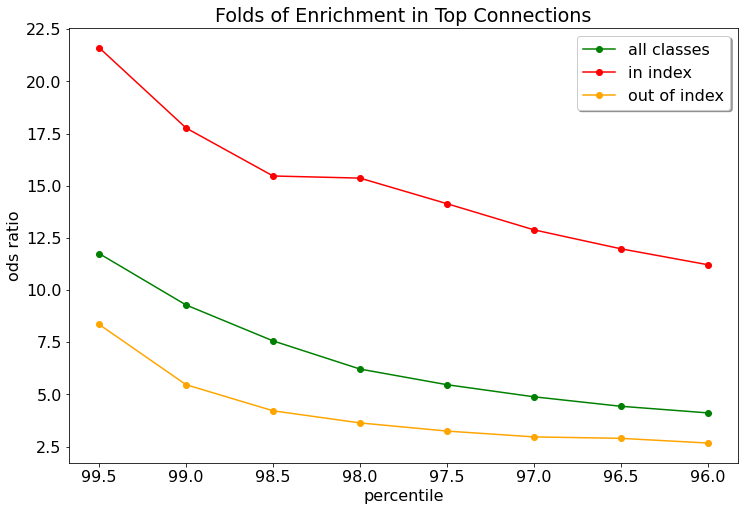

In [133]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*base_enr["enrichment_percentile"], base_enr["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*df1025_in_enr["enrichment_percentile"], df1025_in_enr["ods_ratio"], marker="o", color="red", label = 'in index')
plt.plot(100*df1025_out_enr["enrichment_percentile"], df1025_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()


In [134]:
base_pre_in = base_pre_all[base_pre_all.Metadata_broad_sample.isin(select['0'].tolist())]
pr_av = []
for k in base_pre_in.k.unique():
    pr_av.append(base_pre_in.query("k==@k").mean().tolist())
base_pre_in = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])

In [135]:
base_pre_out = base_pre_all[~base_pre_all.Metadata_broad_sample.isin(select['0'].tolist())]
pr_av = []
for k in base_pre_out.k.unique():
    pr_av.append(base_pre_out.query("k==@k").mean().tolist())
base_pre_out = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])

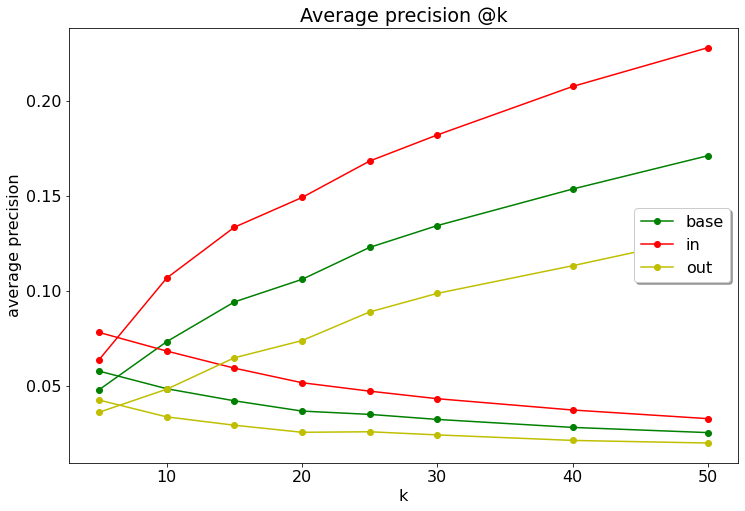

In [136]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="green", label = 'base')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="g")
plt.plot(base_pre_in["k"], base_pre_in["precision"], marker="o", color="r", label = 'in')
plt.plot(base_pre_in["k"], base_pre_in["recall"], marker="o", color="red")
plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

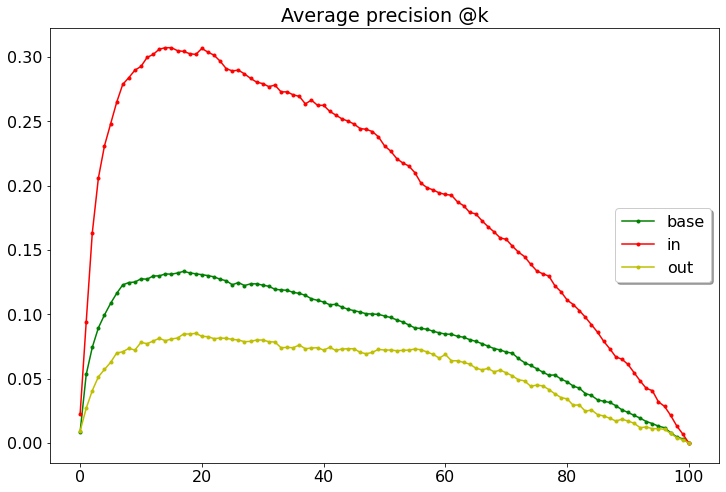

In [137]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_hit, marker=".", color="g", label = 'base')
plt.plot(df1025_in_hit, marker=".", color="r", label = 'in')
plt.plot(df1025_out_hit, marker=".", color="y", label = 'out')
plt.legend(loc = 'center right', shadow=True)
plt.show()

# 924
High phenotype MOAs

In [ ]:
df924_in = df[df.Metadata_moa.isin(index924['Metadata_moa'].unique().tolist())]
df924_out = df[~df.Metadata_moa.isin(index924['Metadata_moa'].unique().tolist())]

In [ ]:
print(df924_in.shape)
print(df924_out.shape)

In [ ]:
name = "df924_in"
features = infer_cp_features(df924_in)
meta_features = infer_cp_features(df924_in, metadata=True)
e = eval.evaluation(df924_in, features=features, meta_features=meta_features)
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

In [ ]:
name = "df924_out"
exec("features = infer_cp_features(" + name + ")")
exec("meta_features = infer_cp_features(" + name + ", metadata=True)")
exec("e = eval.evaluation(" + name + " , features=features, meta_features=meta_features)")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*base_enr["enrichment_percentile"], base_enr["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*df924_in_enr["enrichment_percentile"], df924_in_enr["ods_ratio"], marker="o", color="red", label = 'in index')
plt.plot(100*df924_out_enr["enrichment_percentile"], df924_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [ ]:
base_pre_in = base_pre_all[base_pre_all.Metadata_broad_sample.isin(index924['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_in.k.unique():
    pr_av.append(base_pre_in.query("k==@k").mean().tolist())
base_pre_in = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])

In [ ]:
base_pre_out = base_pre_all[~base_pre_all.Metadata_broad_sample.isin(index924['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_out.k.unique():
    pr_av.append(base_pre_out.query("k==@k").mean().tolist())
base_pre_out = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="green", label = 'base')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="g")
plt.plot(base_pre_in["k"], base_pre_in["precision"], marker="o", color="r", label = 'in')
plt.plot(base_pre_in["k"], base_pre_in["recall"], marker="o", color="red")
plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_hit, marker=".", color="g", label = 'base')
plt.plot(df924_in_hit, marker=".", color="r", label = 'in')
plt.plot(df924_out_hit, marker=".", color="y", label = 'out')
plt.legend(loc = 'center right', shadow=True)
plt.show()
